In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import sympy as sym

### Основные функции

Функция, возвращающая уравнение окружности

In [2]:
def equations(x, y, r):
    return ((x - sym.Symbol('x')) ** 2 + (y - sym.Symbol('y')) ** 2 - r ** 2)

Функция нахождения расстояние между центрами окружностей

In [3]:
def distance(x1, y1, x2, y2):
    return (math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))

Функция нахождения пересечения 2-х окружностей, возвращает массив кооринат точек

In [4]:
def collision(eq1, eq2):
    x, y = sym.symbols('x, y')
    roots = sym.solve([sym.Eq(eq1,0), sym.Eq(eq2,0)], [x, y])
    return roots

Функция отрисовки точек

In [5]:
def drawPoints(x, y, r, color):
    circle = plt.Circle((x, y), r, color = color)
    plt.gca().add_artist(circle)

Функция отрисовки окружностей

In [6]:
def drawCircle(center, r, color):
    circle = plt.Circle (center, r, color = color, fill = False)
    plt.gca().add_artist(circle)

Функция нахождения всех пересечений окружностей, возвращает массив кооринат точек

In [7]:
def finder_collision(points, radius):
    point_col = []
    ps = []
    for i in range(len(radius) - 1):  
        for j in range(i + 1, len(radius)):
          
            dist = distance(points[i][0], points[i][1], points[j][0], points[j][1])
          
            if dist != 0 and not(dist > (radius[j] + radius[i]) or dist < (abs(radius[j] - radius[i]))):
                eq1 = equations(points[i][0], points[i][1], radius[i])
                eq2 = equations(points[j][0], points[j][1], radius[j])
                ps = collision(eq1, eq2)
            
                for k in range(len(ps)):
                    point_col.append(ps[k])
    return point_col

Функция нахождения предполагаемой позиции

In [8]:
def find_pos(point_col):
    x = 0
    y = 0
    for xi, yi in point_col:
        x += xi
        y += yi
        
    return float(x / len(point_col)), float(y / len(point_col))

Функция нахождения действительного позиции

In [9]:
def find_real_pos(x, y, points, radius):
    dx = 0
    dy = 0
    
    for i in range(20): 
        x += dx
        y += dy
        
        avg = []
        matr = []
        
        for i in range(len(radius)):
            r = math.sqrt((points[i][0] - x) ** 2 + (points[i][1] - y) ** 2)
            avg.append([radius[i] - r]) 
            matr.append([(x - points[i][0]) / r, (y - points[i][1]) / r, 1])
            
        [[dx], [dy], [dt]] = np.matmul(np.linalg.pinv(np.array(matr)),np.array(avg))
        
    return x, y, dx, dy, dt


Функция рисования

In [10]:
def draw(points, radius, col_points, size):

    COLOR = ['green', 'red', 'blue', 'purple', 'cyan', 'maroon']
    
    plt.axis([-1 * size, size, -1 * size, size])
    plt.axis ("equal")

    for xi, yi in col_points:
        drawPoints(xi, yi, 20, 'black')

    for i in range(len(radius)):
        drawCircle(points[i], radius[i], color = COLOR[i])
    

Функция вывода предполагаемого положения

In [11]:
def predict(points, radius):
    mypoints = finder_collision(points, radius)

    draw(points, radius, mypoints, 1000)
    
    x, y = find_pos(mypoints)
    print(f'Предпологаемое положение ({x:.4f}, {y:.4f})')
    drawPoints(x, y, 20, color = 'red')

Функция вывода наивероятностного положения

In [12]:
def exect(points, radius):
    mypoints = finder_collision(points, radius)
    x, y = find_pos(mypoints)
    
    x, y, dx, dy, dt = find_real_pos(x, y, points, radius)
    
    print(f'Наивероятностное положение ({x:.4f}, {y:.4f})')
    print(f'Погрешности координат и времени:')
    print(f'dx = {dx}')
    print(f'dy = {dy}')
    print(f'dt = {abs(dt)}')
    
    draw(points, radius, mypoints, 500)
    
    drawPoints(x, y, 20, 'red')

Функция работы с пользоватетелем

In [13]:
def get_data():
    points = []
    radius = []
    
    print("Укажите количество спутников:")
    n = int(input())
    
    for i in range(n):
        print(f'Укажите координаты x, y {i + 1} спутника')
        x, y = map(float, input().split(', '))
        points.append((x, y))
            
        print(f'Укажите расстояние до {i + 1} спутника')
        radius.append(float(input()))
            
    return points, radius

### Часть 1

Входные данные

In [15]:
points = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 1000)]
radius = [149.4139, 330.6324, 917.4691, 775.1122, 771.5541]

Предпологаемое положение (133.3261, 83.4035)


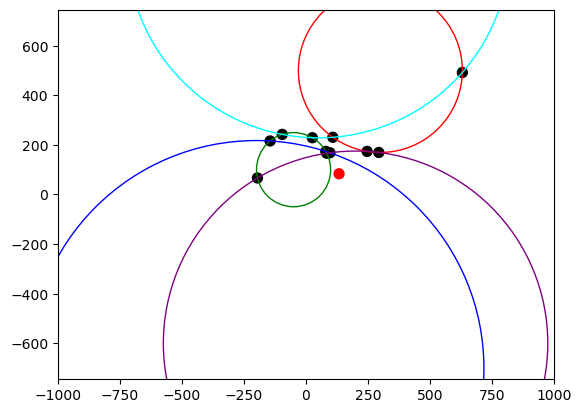

In [16]:
predict(points, radius)

Наивероятностное положение (99.9148, 199.3946)
Погрешности координат и времени:
dx = 8.570752864828289e-14
dy = -4.6858439356077776e-14
dt = 30.53469876137026


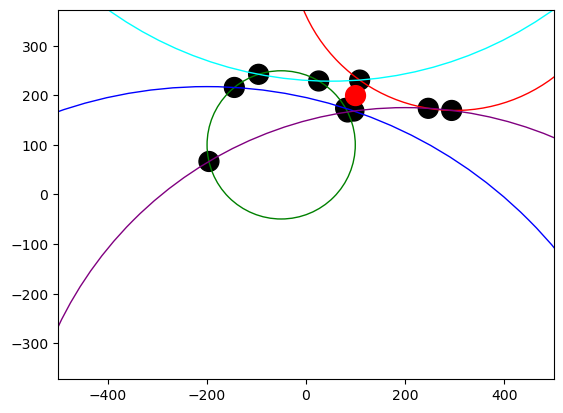

In [17]:
exect(points, radius)

### Часть 2

Входные данные для 4 спутников

In [18]:
points = [(-50, 100), (300, 500), (-200, -700), (200, -600)]
radius = [149.4139, 330.6324, 917.4691, 775.1122]

Предпологаемое положение (116.3756, -24.0903)


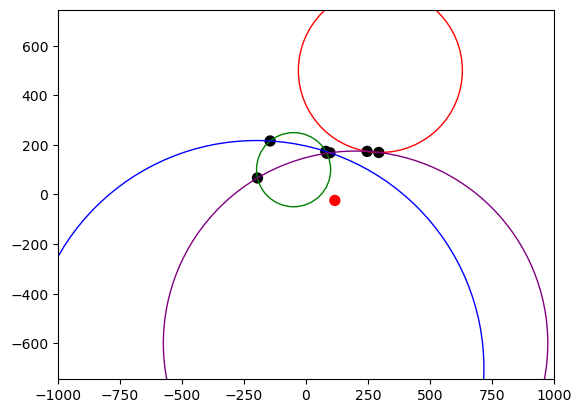

In [19]:
predict(points, radius)

Наивероятностное положение (99.9691, 199.3264)
Погрешности координат и времени:
dx = 4.618527782440651e-14
dy = -1.1191048088221578e-13
dt = 30.49500329973851


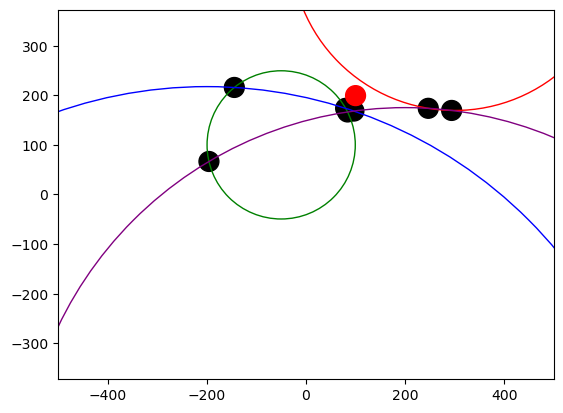

In [20]:
exect(points, radius)

Входные данные для 4 спутников (исключается тот, у кого больше всего пересечений)

In [21]:
points = [ (300, 500), (-200, -700), (200, -600), (50, 1000)]
radius = [ 330.6324, 917.4691, 775.1122, 771.5541]

Предпологаемое положение (307.6684, -15.4484)


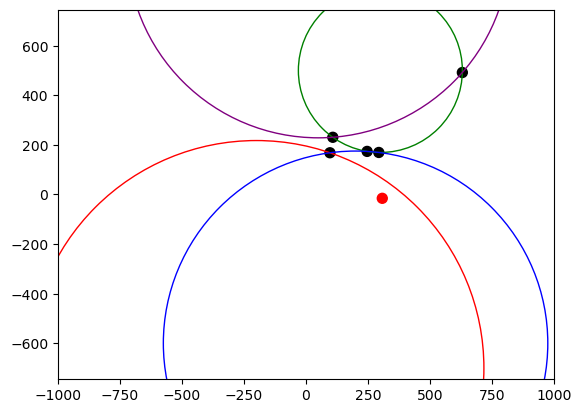

In [22]:
predict(points, radius)

Наивероятностное положение (99.7091, 199.4169)
Погрешности координат и времени:
dx = -9.237055564881302e-14
dy = 7.283063041541027e-14
dt = 30.57005380230097


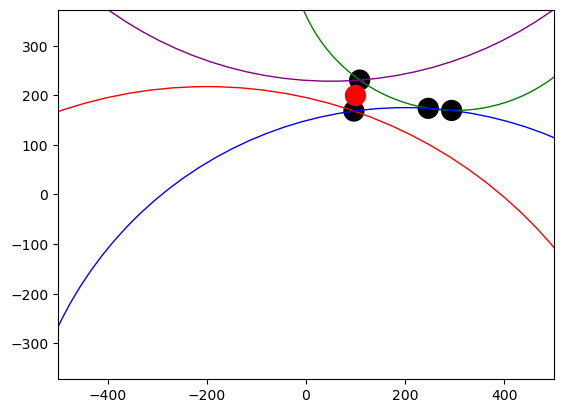

In [23]:
exect(points, radius)

Входные данные для 3 спутников 

In [24]:
points = [(300, 500), (-200, -700), (200, -600)]
radius = [ 330.6324, 917.4691, 775.1122]

Предпологаемое положение (276.8070, -203.7814)


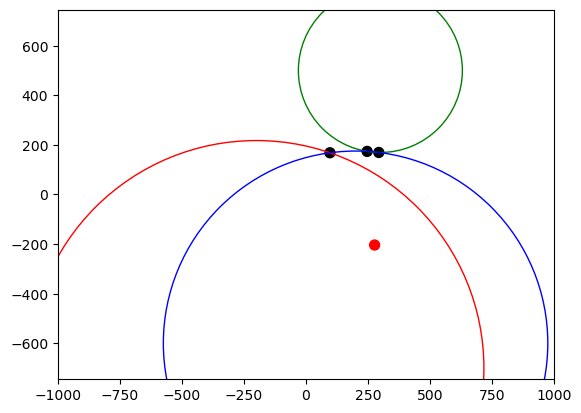

In [25]:
predict(points, radius)

Наивероятностное положение (99.7137, 199.4148)
Погрешности координат и времени:
dx = 2.520442433990584e-13
dy = -1.4568032349397234e-13
dt = 30.56848368391586


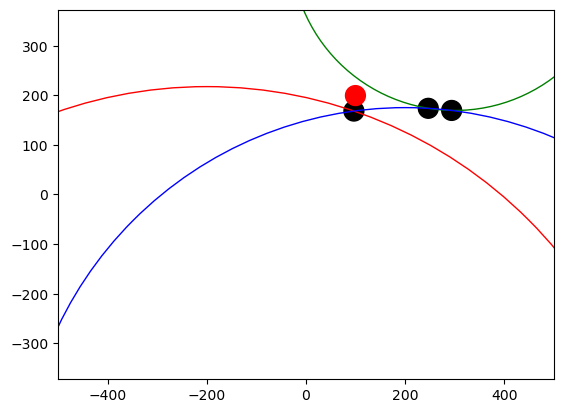

In [26]:
exect(points, radius)

### Часть 3

Введем данные использовав пользовательский ввод

In [27]:
points, radius = get_data()
print(points, radius)

Укажите количество спутников:


 4


Укажите координаты x, y 1 спутника


 200, 700


Укажите расстояние до 1 спутника


 200


Укажите координаты x, y 2 спутника


 50 , 50


Укажите расстояние до 2 спутника


 300


Укажите координаты x, y 3 спутника


 300, 500


Укажите расстояние до 3 спутника


 330


Укажите координаты x, y 4 спутника


 50, 1000


Укажите расстояние до 4 спутника


 700


[(200.0, 700.0), (50.0, 50.0), (300.0, 500.0), (50.0, 1000.0)] [200.0, 300.0, 330.0, 700.0]


Предпологаемое положение (181.1562, 439.0866)


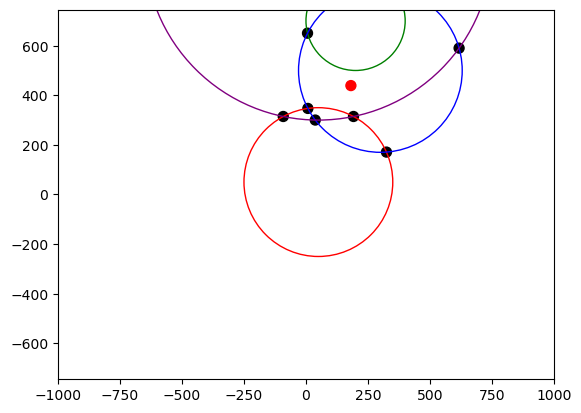

In [28]:
predict(points, radius)

Наивероятностное положение (52.8989, 375.2231)
Погрешности координат и времени:
dx = 1.18360599543621e-06
dy = -1.9937619555321362e-07
dt = 13.343690347707472


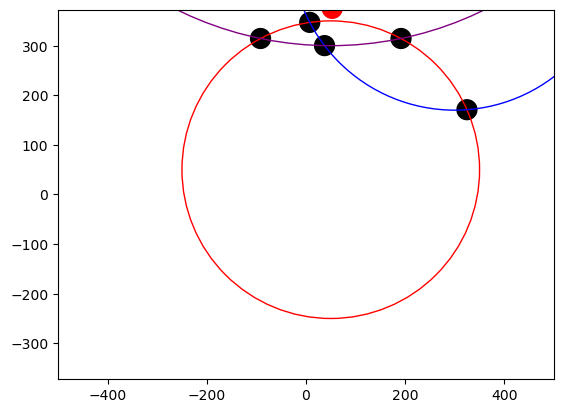

In [29]:
exect(points, radius)